In [ ]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [ ]:
 # Словарь для записи логарифма e-value для каждой протеомы.
data_dict = {'human': [], 'mouse': [], 'zebrafish': [],
             'drosophila': [], 'c.elegans': [],
             'ciliate': [], 'yeast': [],
             'methanocaldococcus': [], 'thermococcus': [],
             'e.coli': [], 'tuberculosis': []}
# Словарь для записи e-value для каждой протеомы.
data_dict_opt = copy.deepcopy(data_dict)

def get_data(dir: str):
  '''
  Вспомогательная функция для извлечения e-value из файлов
  и последующей записи в словарь.
  '''
  global data_dict
  for filename in os.listdir(dir):
    f = os.path.join(dir, filename)
    with open(f) as file:
      lines = [line.rstrip() for line in file]
    e_value = float(lines[5].split()[10])
    e_value = e_value if (e_value >= 1e-300) else 1e-300
    e_value_log = -math.log10(e_value)
    for key in list(data_dict):
      if key in filename:
        data_dict[key].append(e_value_log)
        data_dict_opt[key].append(e_value)

# Вызов функций для гистонов и белка.
# Файлы .blast были помещены в соответствующие папки внутри Google Colab.
get_data("/content/files_h2a")
get_data("/content/files_h2b")
get_data("/content/files_h3")
get_data("/content/files_h4")
get_data("/content/files_wdr5")
print(data_dict)
print(data_dict_opt)

{'human': [87.70996538863749, 87.55595520408193, 95.65955588515988, 66.96257350205937, 300.0], 'mouse': [86.38721614328027, 87.70996538863749, 95.81247927916354, 67.11918640771921, 300.0], 'zebrafish': [81.32148162095989, 82.73048705578208, 94.75202673363819, 67.94692155651659, 300.0], 'drosophila': [67.35951856302958, 59.56066730616974, 95.02733440773389, 67.09582563171584, 300.0], 'c.elegans': [65.0, 65.22329881601159, 93.35066514128786, 67.21112488422459, 166.31785492362616], 'ciliate': [55.99139982823808, 50.33535802444388, 85.07520400420209, 44.707743928643524, 53.94309514866353], 'yeast': [62.15552282425432, 59.995678626217355, 86.48017200622428, 51.96657624451305, 45.913640169325255], 'methanocaldococcus': [3.4122890349810886, -0.2304489213782739, 1.4685210829577449, 4.0851281824599495, 0.744727494896694], 'thermococcus': [2.5228787452803374, -0.07918124604762482, 1.2441251443275085, 4.480172006224281, 1.4559319556497243], 'e.coli': [-0.2304489213782739, -0.20411998265592482, 0.

In [ ]:
rows = ['H2A', 'H2B', 'H3', 'H4', 'WDR5']
cols = ['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans',
        'ciliate', 'yeast', 'methanocaldococcus', 'thermococcus',
        'e.coli', 'tuberculosis']

# Таблица для E-value.
table = pd.DataFrame(data_dict_opt.values(), index=cols, columns=rows).transpose()
table

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
H2A,1.950000e-88,4.100000e-87,4.770000e-82,4.370000e-68,1.000000e-65,1.020000e-56,6.990000e-63,0.000387,0.003000,1.70,0.430
H2B,2.780000e-88,1.950000e-88,1.860000e-83,2.750000e-60,5.980000e-66,4.620000e-51,1.010000e-60,1.700000,1.200000,1.60,2.300
H3,2.190000e-96,1.540000e-96,1.770000e-95,9.390000e-96,4.460000e-94,8.410000e-86,3.310000e-87,0.034000,0.057000,0.90,4.600
H4,1.090000e-67,7.600000e-68,1.130000e-68,8.020000e-68,6.150000e-68,1.960000e-45,1.080000e-52,0.000082,0.000033,1.30,0.069
WDR5,1.000000e-300,1.000000e-300,1.000000e-300,1.000000e-300,4.810000e-167,1.140000e-54,1.220000e-46,0.180000,0.035000,0.55,0.260


In [ ]:
# Аналогично таблица для -log(E-value)
table_log = pd.DataFrame(data_dict.values(), index=cols, columns=rows).transpose()
table_log

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
H2A,87.709965,86.387216,81.321482,67.359519,65.000000,55.991400,62.155523,3.412289,2.522879,-0.230449,0.366532
H2B,87.555955,87.709965,82.730487,59.560667,65.223299,50.335358,59.995679,-0.230449,-0.079181,-0.204120,-0.361728
H3,95.659556,95.812479,94.752027,95.027334,93.350665,85.075204,86.480172,1.468521,1.244125,0.045757,-0.662758
H4,66.962574,67.119186,67.946922,67.095826,67.211125,44.707744,51.966576,4.085128,4.480172,-0.113943,1.161151
WDR5,300.000000,300.000000,300.000000,300.000000,166.317855,53.943095,45.913640,0.744727,1.455932,0.259637,0.585027


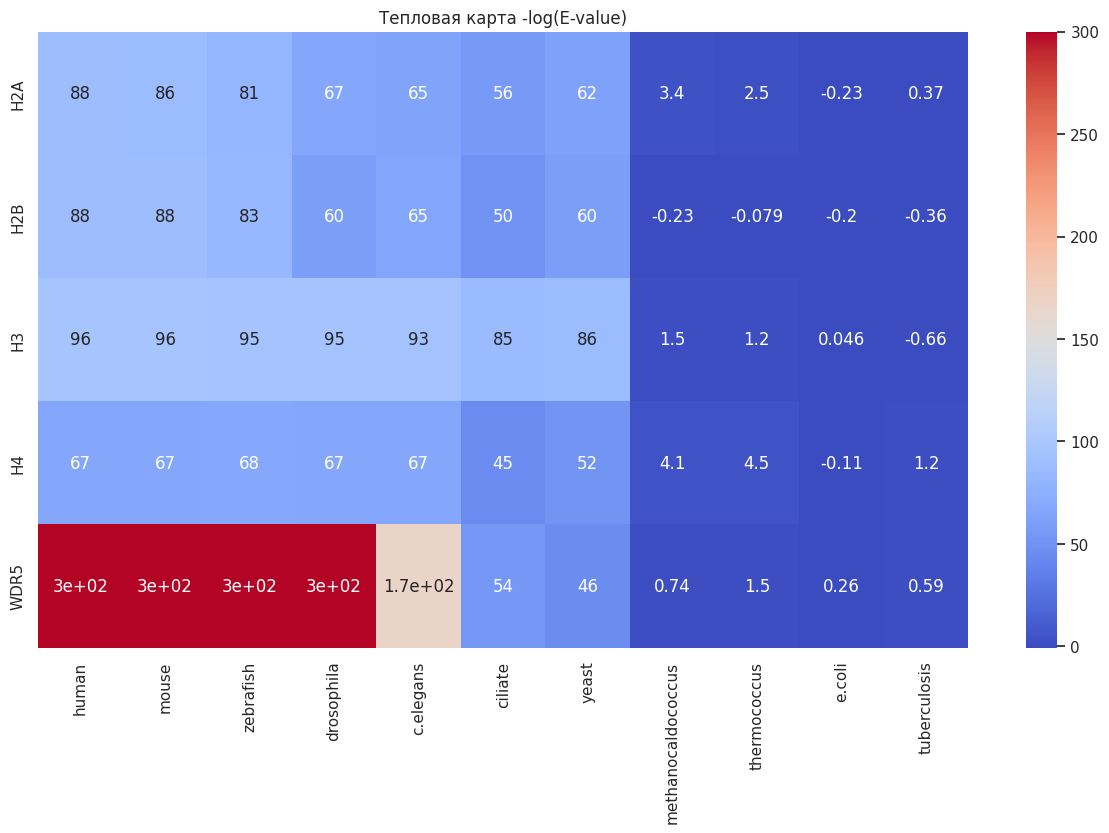

In [ ]:
# Построение тепловой карты.
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(table_log, annot=True, cmap= 'coolwarm')
plt.title("Тепловая карта -log(E-value)")
plt.show()